<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/AD1_examen_parcial_2_2026_prob1_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examen Parcial 2 Análisis de Datos I.
## Ingeniería en Industria Conectada 9 Diciembre 2024

Nombre :


## Parte2.- Ejercicios. (6 ptos)

#### Ejercicio .- Una empresa de coches ha sacado un nuevo modelo al mercado. Queremos saber la probabilidad de que una persona con una cierta edad y un determinado salario pueda comprar ese coche.

In [ ]:
# 0. Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# 1. Importar datos y ver las primeras 10 lineas
datos = pd.read_csv('https://drive.google.com/uc?id=1Tt2YOz6CVUCqgQ4Ob50PdWG81UyyeQTB')
datos.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


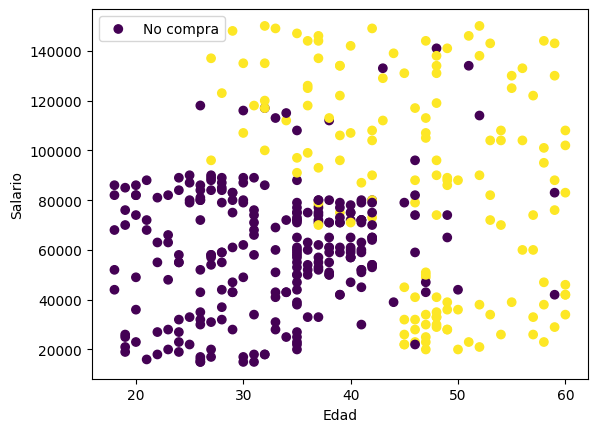

In [ ]:
# 2. Visualizar las variables independientes (gráfico de puntos con dos colores en base a la variable compra)
Independientes = datos[['Edad', 'Salario']].values
Dependiente = datos['Compra'].values

plt.scatter(Independientes[:, 0], Independientes[:, 1], c=Dependiente)
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend(['No compra', 'Compra'])
plt.show()

In [ ]:
# 3. Formar el conjunto de datos necesario utilizando las Variables Edad y Salario como independientes y Compra como dependiente
Independientes = datos[['Edad', 'Salario']].values
Dependiente = datos['Compra'].values

In [ ]:
#4.·Estandarizar los datos predictores utilizando "StandardScaler" de la librería   sklearn
#utilizar estos datos para construir el modelo de regresión logística
sc = StandardScaler()
#guardo una copia de los datos independientes para luego la representacion
Independientes_original = Independientes.copy()
Independientes = sc.fit_transform(Independientes)

In [ ]:
#4.- Calcular el Coste Inicial (Escribir las funciones necesarias)
#Debería ser  Cost at initialization [0.69314718]
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para calcular el coste
def calcular_costo(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    costo = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return costo

# Añadir columna de unos para el término de sesgo (bias)
X = np.hstack((np.ones((Independientes.shape[0], 1)), Independientes))
y = Dependiente.reshape(-1, 1)
theta_inicial = np.zeros((X.shape[1], 1))

# Calcular el coste inicial
costo_inicial = calcular_costo(X, y, theta_inicial)
print("Costo inicial:", costo_inicial)



Costo inicial: [[0.69314718]]


In [ ]:
#5 Obtener el vector gradiente inicial, debería ser
#Gradient at initialization: [[ 0.1425    ]
# [-0.29831974]
# [-0.17353327]]
# Función para calcular el gradiente
def calcular_gradiente(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradiente = (1 / m) * (X.T @ (h - y))
    return gradiente

# Calcular el gradiente inicial
gradiente_inicial = calcular_gradiente(X, y, theta_inicial)

print("Vector gradiente inicial:")
print(gradiente_inicial)


Vector gradiente inicial:
[[ 0.1425    ]
 [-0.29831974]
 [-0.17353327]]


In [ ]:
#5.- Implementar Gradiente descendente. Utilizar:
#alfa 0.01,
#iteraciones 200000
#Imprimir el valor final de la función de coste?
def gradiente_descendente(X, y, theta, alpha, iteraciones):
    m = len(y)
    historial_costo = []

    for _ in range(iteraciones):
        h = sigmoid(X @ theta)
        theta -= (alpha / m) * (X.T @ (h - y))
        historial_costo.append(calcular_costo(X, y, theta))

    return theta, historial_costo

# Preparar los datos para regresión logística
X = np.hstack((np.ones((Independientes.shape[0], 1)), Independientes))
y = Dependiente.reshape(-1, 1)
theta_inicial = np.zeros((X.shape[1], 1))

# Hiperparámetros
alpha = 0.01
iteraciones = 200000

# Ejecutar gradiente descendente
theta_final, historial_costo = gradiente_descendente(X, y, theta_inicial, alpha, iteraciones)

# Imprimir resultados finales
print("Theta final:", theta_final.ravel())
print("Costo final:", historial_costo[-1])

Theta final: [-1.13812197  2.44457954  1.22258176]
Costo final: [[0.34631423]]


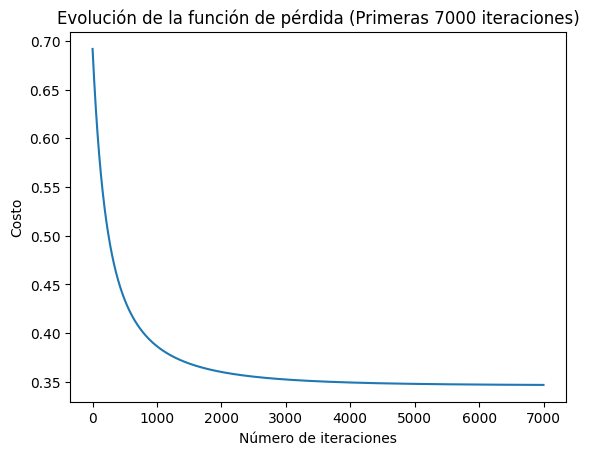

In [ ]:
#6.- Dibujar la función de pérdida
# Asegurar que el historial de costo sea un vector 1D
historial_costo = [costo[0, 0] if isinstance(costo, np.ndarray) else costo for costo in historial_costo]

# Limitar el historial de costo a las primeras 2000 iteraciones
historial_costo = historial_costo[:7000]

# Dibujar la función de pérdida
plt.plot(range(len(historial_costo)), historial_costo)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.title('Evolución de la función de pérdida (Primeras 7000 iteraciones)')
plt.show()


In [ ]:
#7.- Imprimir los valores finales del vector "theta"
print("Valores finales del vector theta:")
print(theta_final.ravel())

Valores finales del vector theta:
[-1.13812197  2.44457954  1.22258176]


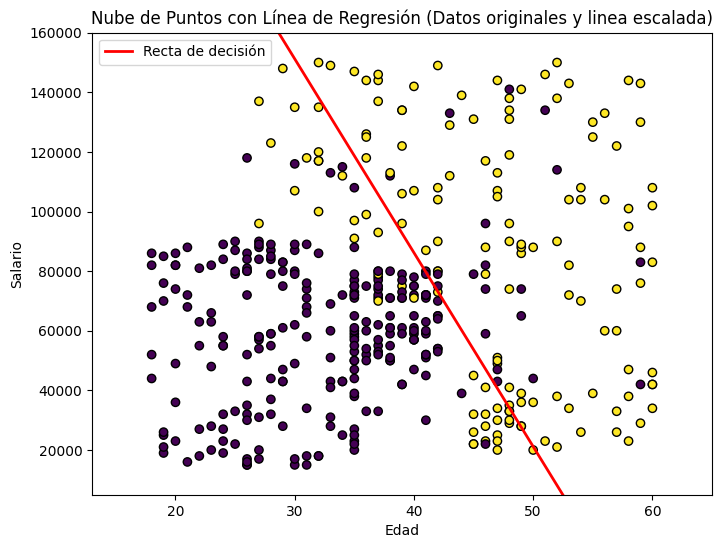

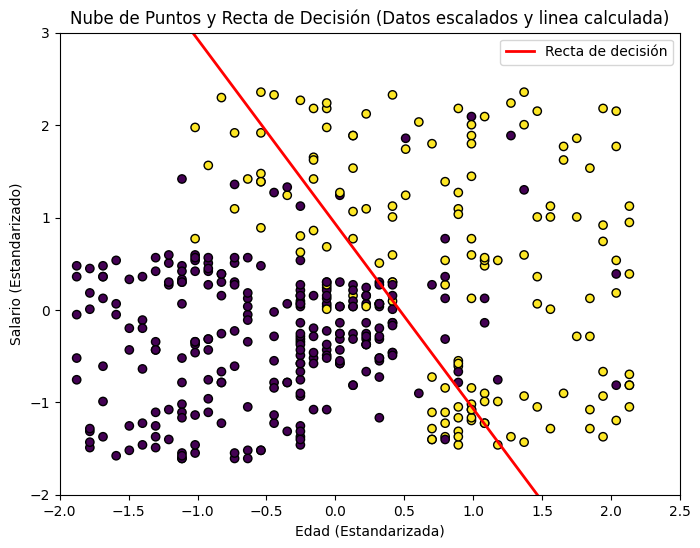

In [ ]:
# Dibujar la nube de puntos y la recta de decisión (con los datos originales)
x_min, x_max = Independientes_original[:, 0].min() - 5, Independientes_original[:, 0].max() + 5
x_values = np.linspace(x_min, x_max, 100)

# Calcular la recta de decisión en la escala original
y_values = -(theta_final[0] + theta_final[1] * (x_values - sc.mean_[0]) / sc.scale_[0]) / (
    theta_final[2] / sc.scale_[1]
) + sc.mean_[1]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(Independientes_original[:, 0], Independientes_original[:, 1], c=Dependiente, edgecolors="k", cmap="viridis")
plt.plot(x_values, y_values, color="red", linewidth=2, label="Recta de decisión")
plt.xlim(x_min, x_max)  # Ajustar los límites del eje X
plt.ylim(Independientes_original[:, 1].min() - 10000, Independientes_original[:, 1].max() + 10000)  # Ajustar los límites del eje Y
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Nube de Puntos con Línea de Regresión (Datos originales y recta escalada)')
plt.legend()
plt.grid(False)
plt.show()

#COn los datos escalados
x_min=2
x_max=3
y_min=-2
y_max=3
x_values = np.linspace(x_min, x_max, 100)

# Dibujar la nube de puntos y la recta de decisión (con los datos originales)
x_min, x_max = Independientes[:, 0].min() - 1, Independientes[:, 0].max() + 1
x_values = np.linspace(x_min, x_max, 100)

# Calcular la recta de decisión: theta_0 + theta_1 * x1 + theta_2 * x2 = 0 => x2 = -(theta_0 + theta_1 * x1) / theta_2
y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(Independientes[:, 0], Independientes[:, 1], c=Dependiente, edgecolors="k")
plt.plot(x_values, y_values, color="red", linewidth=2, label="Recta de decisión")
plt.xlim(-2, 2.5)
plt.ylim(-2, 3)
plt.xlabel('Edad (Estandarizada)')
plt.ylabel('Salario (Estandarizado)')
plt.title('Nube de Puntos y Recta de Decisión (Datos escalados y recta calculada)')
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
# 9. Utilizando las funciones de la librería sklearn:
# Imprimir la precisión del Modelo
#Obtener la matriz de confusión
y_pred = (sigmoid(X @ theta_final) >= 0.5).astype(int)

# Calcular la precisión del modelo
precision = accuracy_score(Dependiente, y_pred)
print("Precisión del modelo:", precision)

# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(Dependiente, y_pred)
print("Matriz de confusión:")
print(matriz_confusion)


Precisión del modelo: 0.845
Matriz de confusión:
[[236  21]
 [ 41 102]]


In [ ]:
#10..-Una persona desconocida con 50 años y salario 35000 que probabilidad tiene de comprar el coche ?
#     Una persona desconocida con 30 años y salario 45000 que probabilidad tiene de comprar el coche ?
# Crear las entradas para las personas desconocidas

nuevos_datos = np.array([[50, 35000], [30, 45000]])

# Estandarizar los nuevos datos con el mismo scaler utilizado previamente
nuevos_datos_estandarizados = sc.transform(nuevos_datos)

# Agregar la columna de unos para el término de sesgo (bias)
nuevos_datos_estandarizados = np.hstack((np.ones((nuevos_datos_estandarizados.shape[0], 1)), nuevos_datos_estandarizados))

# Calcular la probabilidad utilizando la función sigmoide
probabilidades = sigmoid(nuevos_datos_estandarizados @ theta_final)

# Mostrar los resultados
print(f"Probabilidad de compra para la persona de 50 años y salario 350,000: {probabilidades[0, 0]:.4f}")
print(f"Probabilidad de compra para la persona de 30 años y salario 450,000: {probabilidades[1, 0]:.4f}")


Probabilidad de compra para la persona de 50 años y salario 350,000: 0.6218
Probabilidad de compra para la persona de 30 años y salario 450,000: 0.0216
